# 🤖 Aprendizaje de Máquina
## 🧠 Proyecto BCI
## [01] Remuestreo

Realizado por:
* Iván Alejandro Ramos Herrera.
* Santiago Licea Becerril.

# 🔎 Exploración

En esta sección se analizará la estructura del conjunto de datos para determinar si existen inconsistencias o no para un preprocesamiento adecuado.


## Lectura del dataset crudo
### Estructura:

Ruta: /content/drive/MyDrive/IIMAS/ML-DATASET/EMOTIV/profiles

Carpetas

* Abraham1
* Abraham2
* Alex1
* Alex2
* ...
* pep1
* pep2



In [175]:
import os

dataset_path = "/content/drive/MyDrive/IIMAS/ML-DATASET/EMOTIV/profiles"

# Lista el contenido de la carpeta:
if os.path.exists(dataset_path):
    directory_content = os.listdir(dataset_path)
    print(f"Contenido de la carpeta {dataset_path}:")
    print(directory_content)
    print("Cantidad de datasets:", len(directory_content))
else:
    print(f"Ruta {dataset_path} incorrecta! :c")

Contenido de la carpeta /content/drive/MyDrive/IIMAS/ML-DATASET/EMOTIV/profiles:
['Raul2do1', 'Padilla1', 'Yolanda1', 'Gus1', 'Meza1', 'joul2', 'Jorge2do1', 'Yissel1', 'Jorge2do2', 'pep1', 'Isabela2', 'Padilla2', 'Raul2do2', 'Valeria1', 'dad1', 'Daniela2', 'Bere1', 'Bere2', 'Valeria2', 'Montse1', 'Juliett1', 'Abraham2', 'Roman2', 'Isabela1', 'Juliett2', 'Alex2', 'Oscar1', 'Diego2do2', 'Yissel2', 'Hiram2', 'Meli1', 'Yolanda2', 'mom2', 'Hiram1', 'Eloy1', 'Alex1', 'pep2', 'Montse2', 'Fer1', 'Eloy2', 'Meli2', 'mom1', 'joul1', 'Gus2', 'Andy1', 'Daniela1', 'Abraham1', 'Meza2', 'Andy2', 'Roman1', 'Oscar2', 'Fer2', 'Diego2do1', 'dad2']
Cantidad de datasets: 54


**Se contienen 54 datasets; que corresponden a DOS por cada individuo, de un total de 27 individuos.**

Cada dataset viene incluído en una carpeta con el nombre de la persona seguido de un número [1, 2]:

* [1] Representa el dataset con las etiquetas de "Evocación de un concepto".
* [2] Representa el dataset con las etiquetas de "Intención de Movimiento"

## Ejemplo de un dataset

In [176]:
import pandas as pd

example_dataset = pd.read_csv(dataset_path+"/Alex1/dataset.csv")
print(example_dataset.head)

<bound method NDFrame.head of         Channel 1    Channel 2    Channel 3    Channel 4    Channel 5  \
0     4132.307617  4416.666504  4132.563965  4135.128418  4127.051270   
1     4157.179688  4160.512695  4166.025879  4161.666504  4153.589844   
2     4107.179688  3427.435791  4130.256348  4137.307617  4118.589844   
3     4590.641113  4121.794922  4125.897461  4113.077148  4155.897461   
4     4157.692383  4165.897461  4164.743652  4149.230957  4107.051270   
...           ...          ...          ...          ...          ...   
8931  4162.692383  4158.717773  4154.230957  4106.538574  3430.256348   
8932  4158.974121  4157.436035  4157.436035  4159.102539  4154.230957   
8933  4154.743652  4150.000000  4157.563965  4162.820312  4161.666504   
8934  4159.871582  4158.717773  4106.153809  3429.230713  4154.102539   
8935  4159.487305  4155.256348  4175.769043  4154.615234  4153.589844   

        Channel 6    Channel 7    Channel 8    Channel 9   Channel 10  \
0     4155.128418  4

## Midiendo balanceo de clases

In [177]:
# Realiza el conteo de las clases en la columna "Expected Output"
class_counts = example_dataset["Expected Output"].value_counts()
print("Conteo de clases:")
print(class_counts)

# Calcula la proporción de cada clase con respecto al total:
classes_proportions = class_counts / len(example_dataset)

Conteo de clases:
Arbol          4916
Cuaderno       1012
Computadora    1012
Perro          1004
Nada            992
Name: Expected Output, dtype: int64


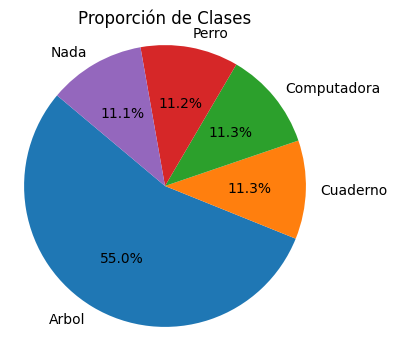

In [178]:
# Grafica las porciones de clases en el dataset:
import matplotlib.pyplot as plt

plt.figure(figsize=(4, 4))
plt.pie(classes_proportions, labels=classes_proportions.index, autopct='%1.1f%%', startangle=140)
plt.title("Proporción de Clases")
plt.axis("equal")
plt.show()

**Únicamente en este ejemplo de dataset se encuentra un desequilibro considerable con la clase "Arbol". Se hará un análisis de desequilibrio para todos los datasets para corroborar desequilibrios.**

**Se utilizará de medida el Inbalance Ratio**, que se calcula de la siguiente manera:

$IR = \frac{C_M}{C_m}$

Donde:

* $C_M = $ Clase mayoritaria (conteo)
* $C_m = $ Clase minoritaria (conteo)

In [179]:
def balance(dataset_path):

  # Obtiene la lista de datasets:
  directory_content = os.listdir(dataset_path)

  # Para cada dataset:
  irs = list()
  for directory in directory_content:

    # Obtiene el dataset y cuenta las clases:
    dataset = pd.read_csv(dataset_path+"/"+directory+"/dataset.csv")
    class_counts = dataset["Expected Output"].value_counts()

    # Clase mayoritaria:
    maj_class = class_counts.idxmax()
    maj_class_amount = class_counts.max()

    # Clase minoritaria:
    min_class = class_counts.idxmin()
    min_class_amount = class_counts.min()

    ir = {"Dataset": directory, "IR": float(maj_class_amount / min_class_amount)}
    irs.append(ir)

  irs = sorted(irs, key=lambda x: x["Dataset"])
  return irs

In [180]:
# Muestra el IR para cada dataset:
irs = balance(dataset_path)
print("Dataset\t\tIR\n_________________________________\n")
for ir in irs:
  print(f"{ir['Dataset']}    {ir['IR']:.2f}")

Dataset		IR
_________________________________

Abraham1    106.71
Abraham2    2.24
Alex1    4.96
Alex2    1.02
Andy1    5.58
Andy2    1.67
Bere1    11.76
Bere2    1.13
Daniela1    25.51
Daniela2    1.00
Diego2do1    1.01
Diego2do2    1.00
Eloy1    67.04
Eloy2    1.00
Fer1    8.59
Fer2    1.09
Gus1    177.12
Gus2    1.07
Hiram1    19.40
Hiram2    3.06
Isabela1    3.74
Isabela2    1.01
Jorge2do1    6.75
Jorge2do2    1.00
Juliett1    5.66
Juliett2    1.47
Meli1    1.01
Meli2    1.01
Meza1    7.20
Meza2    1.16
Montse1    1.01
Montse2    1.02
Oscar1    1.34
Oscar2    2.85
Padilla1    125.88
Padilla2    1.01
Raul2do1    13.72
Raul2do2    1.01
Roman1    1.01
Roman2    1.00
Valeria1    9.53
Valeria2    1.05
Yissel1    20.46
Yissel2    2.36
Yolanda1    1.01
Yolanda2    1.01
dad1    6.68
dad2    1.01
joul1    1.02
joul2    1.01
mom1    6.50
mom2    1.00
pep1    1.75
pep2    2.87


**SE COMPRUEBA QUE ALGUNAS CLASES ESTÁN DESBALANCEADAS. LOS DE IMPORTANCIA SON AQUELLOS QUE TENGAN UNA RELACIÓN DE DESBALANCE 2:1, ES DECIR, QUE LA CLASE MAYORITARIA CONTENGA EL DOBLE DE DATOS QUE LA MINORITARIA, ES DECIR...**

In [181]:
# Muestra los datasets de desbalance considerable:
print("DATASETS DESBALANCEADOS\n")
print("Dataset\t\tIR\n_________________________________\n")
for ir in irs:
  if ir['IR'] >= 2:
    print(f"{ir['Dataset']}    {ir['IR']:.2f}")

DATASETS DESBALANCEADOS

Dataset		IR
_________________________________

Abraham1    106.71
Abraham2    2.24
Alex1    4.96
Andy1    5.58
Bere1    11.76
Daniela1    25.51
Eloy1    67.04
Fer1    8.59
Gus1    177.12
Hiram1    19.40
Hiram2    3.06
Isabela1    3.74
Jorge2do1    6.75
Juliett1    5.66
Meza1    7.20
Oscar2    2.85
Padilla1    125.88
Raul2do1    13.72
Valeria1    9.53
Yissel1    20.46
Yissel2    2.36
dad1    6.68
mom1    6.50
pep2    2.87


## Resultados de desbalance

DATASETS DESBALANCEADOS

| Dataset | IR |
|---------|----|
| Abraham1 | 106.71 |
| Abraham2 | 2.24 |
| Alex1 | 4.96 |
| Andy1 | 5.58 |
| Bere1 | 11.76 |
| Daniela1 | 25.51 |
| Eloy1 | 67.04 |
| Fer1 | 8.59 |
| Gus1 | 177.12 |
| Hiram1 | 19.40 |
| Hiram2 | 3.06 |
| Isabela1 | 3.74 |
| Jorge2do1 | 6.75 |
| Juliett1 | 5.66 |
| Meza1 | 7.20 |
| Oscar2 | 2.85 |
| Padilla1 | 125.88 |
| Raul2do1 | 13.72 |
| Valeria1 | 9.53 |
| Yissel1 | 20.46 |
| Yissel2 | 2.36 |
| dad1 | 6.68 |
| mom1 | 6.50 |
| pep2 | 2.87 |


## Resultado de Análisis

**Preocupaciones principales:**

Existen tres datasets que contienen Índices de desbalance realmente preocupantes, pues estos superan el 100:

| Dataset | IR |
|---------|----|
| Abraham1 | 106.71 |
| Gus1 | 177.12 |
| Padilla1 | 125.88 |

Dada esta situación, se **pondrá atención** a estos conjuntos de datos, pues se desconoce si la razón de tal exagerado desbalance se debe a alguna falla al recopilar las lecturas cerebrales de la fuente original. Dado que podría deberse a una falla al recopilar los datos.

# 📊 Balance

En esta sección se tratará el problema del desbalance de clases, para recontruir un dataset que no genere sesgos.

## Estrategia NEAR-MISS

La técnica de NEAR-MISS contempla la perspectiva de ***UNDERSAMPLING***, que estila ***ELIMINAR*** datos de las clases con datos mayoritarios.

La estratégia de NEAR-MISS elimina los datos menos representativos con base en un análisis de aquellos que aportan menos.

Esta estratégia ayuda cuando los datos son independientes. En este caso tenemos que las lecturas cerebrales son series de tiempo conformadas por una serie de datos (para los cuales importa el órden y que no son independientes).

❌ **ESTA ESTRATÉGIA QUEDA DESCARTADA EN PRIMERA INSTANCIA**

## Reducción de series de tiempo

En esta estratégia se plantea que las series de tiempo correspondiente a las clases mayoritarias se "corten" en sus extremos superiores; de manera que se conserven los últimos 5 segundos representativos de cada pensamiento.

Se analizará para cada dataset desbalanceado (con IR >= 2) y se cortarán las series de tiempo por su inicio de manera que se reduzcan al tamaño promedio de conteo para las demás clases.

In [182]:
# Función para reducir las series de tiempo:
def crop_series(dataset, target_class, target_length):
    # Filtrar solo las muestras de la clase objetivo:
    filtered_data = dataset[dataset["Expected Output"] == target_class]

    # Calcular cuántos registros eliminar desde arriba para abajo:
    num_records_to_remove = len(filtered_data) - target_length

    # Identificar los índices de los registros a eliminar:
    indices_to_remove = filtered_data.head(num_records_to_remove).index

    # Eliminar los registros de la clase mayoritaria:
    reduced_data = dataset.drop(indices_to_remove)

    return reduced_data

In [183]:
# Función para el balanceo de clases:
def balance_datasets(original_path, balanced_path, expected_size):

  # Obtiene la lista de datasets:
  directory_content = os.listdir(original_path)

  # Para cada dataset:
  for directory in directory_content:
    dataset = pd.read_csv(f"{original_path}/{directory}/dataset.csv")
    class_counts = dataset["Expected Output"].value_counts()
    maj_class = class_counts.idxmax()

    # Calcular el IR:
    maj_class_amount = class_counts[maj_class]
    min_class_amount = class_counts.min()
    ir = maj_class_amount / min_class_amount

    # Si el IR es mayor o igual a 2:
    if ir >= 2:
      print(f"\n * Balanceando {directory}...")
      # Calcular el tamaño objetivo promedio:
      # average_length = sum(class_counts[class_counts.index != maj_class]) // (len(class_counts) - 1)
      average_length = expected_size

      # Reducir las series de tiempo de la clase mayoritaria:
      reduced_dataset = crop_series(dataset, maj_class, average_length)

      # Guardar el dataset balanceado en la carpeta "balanced":
      os.makedirs(f"{balanced_path}/{directory}", exist_ok=True)
      reduced_dataset.to_csv(f"{balanced_path}/{directory}/dataset.csv", index=False)
      print(f" * {directory} balanceado!")
    else:
      # Si no es desbalanceado, simplemente copiar el dataset original:
      os.makedirs(f"{balanced_path}/{directory}", exist_ok=True)
      dataset.to_csv(f"{balanced_path}/{directory}/dataset.csv", index=False)

In [184]:
# Balancea los datasets:
print("\nPRIMER DESBALANCEO")
balanced_path = "/content/drive/MyDrive/IIMAS/ML-DATASET/EMOTIV/balanced"
balance_datasets(dataset_path, balanced_path, expected_size=1024)



PRIMER DESBALANCEO

 * Balanceando Raul2do1...
 * Raul2do1 balanceado!

 * Balanceando Padilla1...
 * Padilla1 balanceado!

 * Balanceando Gus1...
 * Gus1 balanceado!

 * Balanceando Meza1...
 * Meza1 balanceado!

 * Balanceando Jorge2do1...
 * Jorge2do1 balanceado!

 * Balanceando Yissel1...
 * Yissel1 balanceado!

 * Balanceando Valeria1...
 * Valeria1 balanceado!

 * Balanceando dad1...
 * dad1 balanceado!

 * Balanceando Bere1...
 * Bere1 balanceado!

 * Balanceando Juliett1...
 * Juliett1 balanceado!

 * Balanceando Abraham2...
 * Abraham2 balanceado!

 * Balanceando Isabela1...
 * Isabela1 balanceado!

 * Balanceando Yissel2...
 * Yissel2 balanceado!

 * Balanceando Hiram2...
 * Hiram2 balanceado!

 * Balanceando Hiram1...
 * Hiram1 balanceado!

 * Balanceando Eloy1...
 * Eloy1 balanceado!

 * Balanceando Alex1...
 * Alex1 balanceado!

 * Balanceando pep2...
 * pep2 balanceado!

 * Balanceando Fer1...
 * Fer1 balanceado!

 * Balanceando mom1...
 * mom1 balanceado!

 * Balanceand

# ✅ Validación

Se mide el impacto del desbalanceo en los datasets generados.

In [185]:
# Se analiza el desbalance para los dataset generados:
# Muestra el IR para cada dataset:
balanced_irs = balance(balanced_path)
print("Dataset\t\tIR\n_________________________________\n")
for ir in balanced_irs:
  print(f"{ir['Dataset']}    {ir['IR']:.2f}")

Dataset		IR
_________________________________

Abraham1    4.57
Abraham2    4.93
Alex1    1.03
Alex2    1.02
Andy1    2.04
Andy2    1.67
Bere1    1.04
Bere2    1.13
Daniela1    1.02
Daniela2    1.00
Diego2do1    1.01
Diego2do2    1.00
Eloy1    1.01
Eloy2    1.00
Fer1    1.82
Fer2    1.09
Gus1    1.10
Gus2    1.07
Hiram1    1.14
Hiram2    127.00
Isabela1    1.02
Isabela2    1.01
Jorge2do1    1.02
Jorge2do2    1.00
Juliett1    1.10
Juliett2    1.47
Meli1    1.01
Meli2    1.01
Meza1    1.95
Meza2    1.16
Montse1    1.01
Montse2    1.02
Oscar1    1.34
Oscar2    125.50
Padilla1    1.02
Padilla2    1.01
Raul2do1    1.01
Raul2do2    1.01
Roman1    1.01
Roman2    1.00
Valeria1    1.35
Valeria2    1.05
Yissel1    1.02
Yissel2    1.65
Yolanda1    1.01
Yolanda2    1.01
dad1    1.81
dad2    1.01
joul1    1.02
joul2    1.01
mom1    1.01
mom2    1.00
pep1    1.75
pep2    255.00


In [186]:
# Muestra los datasets de desbalance considerable:
print("DATASETS DESBALANCEADOS\n")
print("Dataset\t\tIR\n_________________________________\n")
for ir in balanced_irs:
  if ir['IR'] >= 2:
    print(f"{ir['Dataset']}    {ir['IR']:.2f}")

DATASETS DESBALANCEADOS

Dataset		IR
_________________________________

Abraham1    4.57
Abraham2    4.93
Andy1    2.04
Hiram2    127.00
Oscar2    125.50
pep2    255.00


## Excepciones

Se nota que hay excepciones especiales para los datasets:

| Dataset | IR |
|---------|----|
| Abraham1 | 4.57 |
| Abraham2 | 4.93 |
| Andy1 | 2.04 |
| Hiram2 | 127.00 |
| Oscar2 | 125.50 |
| pep2 | 255.0 |

Esto se debe a anomalías en la cantidad de clases...

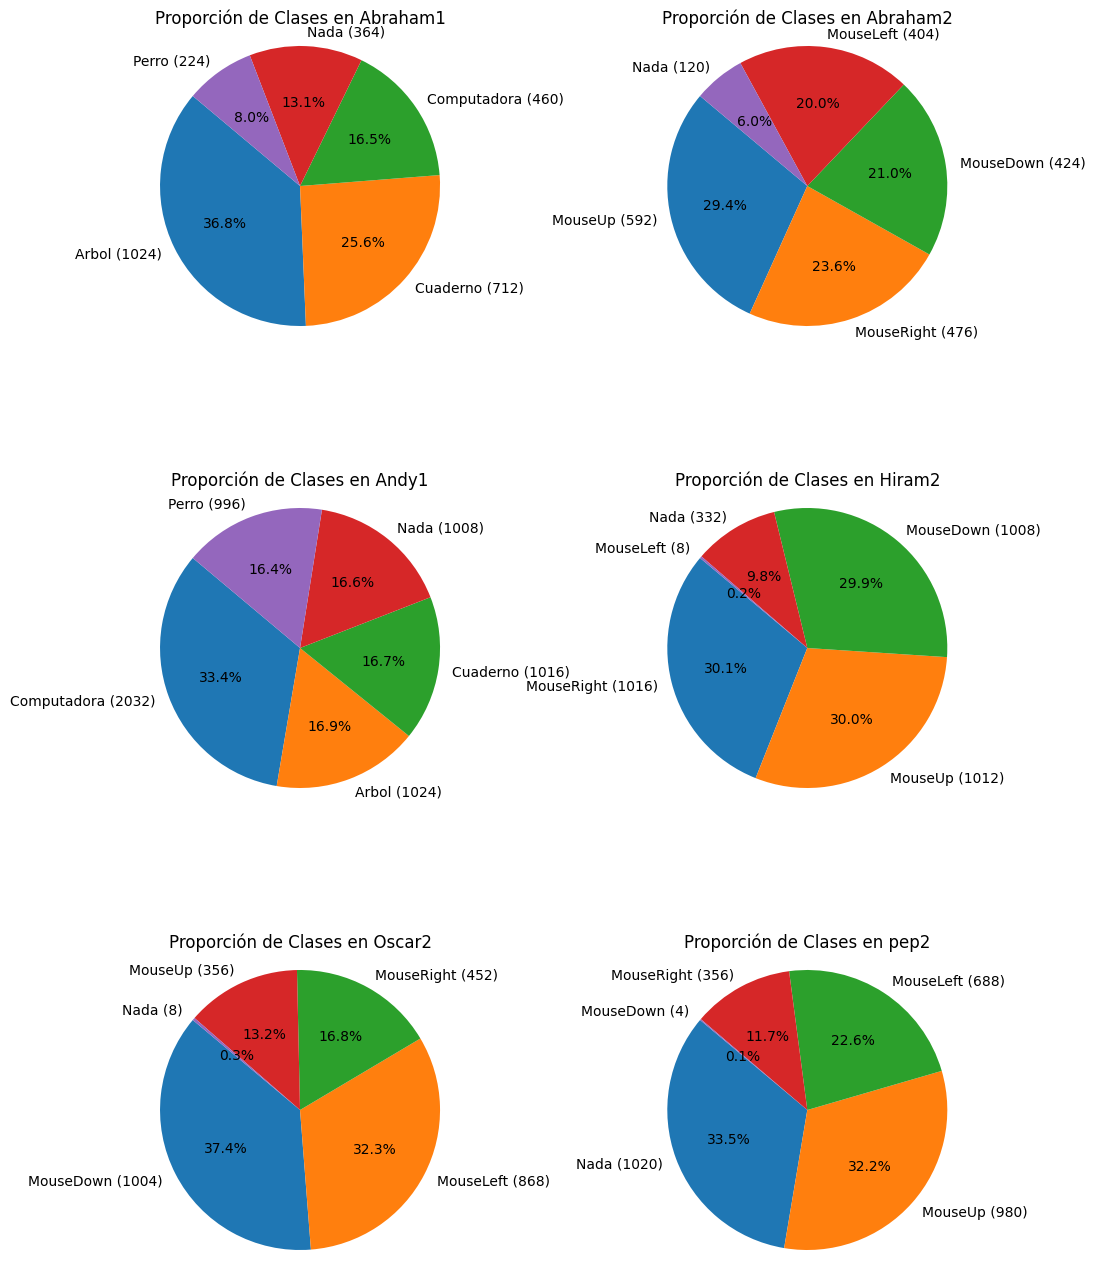

In [187]:
# Datasets especiales:
special_datasets = ["Abraham1", "Abraham2", "Andy1", "Hiram2", "Oscar2", "pep2"]

# Configuración de subplots:
num_rows = 3
num_cols = 2
fig, axs = plt.subplots(num_rows, num_cols, figsize=(12, 16))
plt.subplots_adjust(hspace=0.5)

# Para cada dataset especial:
for i, dataset_name in enumerate(special_datasets):

  # Obtiene la información de cada dataset para validar:
  dataset = pd.read_csv(f"{balanced_path}/{dataset_name}/dataset.csv")
  class_counts = dataset["Expected Output"].value_counts()
  classes_proportions = class_counts / len(dataset)

  # Crea una lista de etiquetas que contienen el nombre y la cantidad
  labels_with_count = [f"{label} ({count})" for label, count in zip(classes_proportions.index, class_counts)]

  # Crea una gráfica para cada caso:
  row = i // num_cols
  col = i % num_cols
  axs[row, col].pie(classes_proportions, labels=labels_with_count, autopct='%1.1f%%', startangle=140)
  axs[row, col].set_title(f"Proporción de Clases en {dataset_name}")
  axs[row, col].axis("equal")

plt.show()

## Eliminación de Excepciones

Existen Datasets que directamente son infactibles de utilizar, pues se recopilaron datos insuficientes para ciertas medidas:

1. [pep2 - MouseDown]: 4 registros.
2. [Oscar2 - Nada]: 8 registros.
3. [Hiram2 - MouseLeft]: 8 registros.
4. [Abraham1 - Perro]: 224 registros.
4. [Abraham2 - Nada]: 120 registros.

El dataset Andy1 aún se puede recuperar mediante otro balanceo.

In [188]:
# Datasets inutilizables:
drop_datasets = ["pep2", "Oscar2", "Hiram2", "Abraham1", "Abraham2"]

# Elimina los datasets:
for dataset_name in drop_datasets:

  # Si existe, lo elimina:
  dataset_path = os.path.join(balanced_path, dataset_name)
  if os.path.exists(dataset_path):
    try:
      os.remove(dataset_path+"/dataset.csv")
      os.rmdir(dataset_path)
      print(f"Dataset [{dataset_name}] eliminado!")
    except OSError as e:
      print(f"No se pudo eliminar el dataset [{dataset_name}].\nError: {e}")
  else:
    print(f"El dataset [{dataset_name}] no existe :c")

Dataset [pep2] eliminado!
Dataset [Oscar2] eliminado!
Dataset [Hiram2] eliminado!
Dataset [Abraham1] eliminado!
Dataset [Abraham2] eliminado!


In [189]:
# Se balancea "Andy1":
dataset = pd.read_csv(f"{balanced_path}/Andy1/dataset.csv")
class_counts = dataset["Expected Output"].value_counts()
maj_class = class_counts.idxmax()
print(f"\n * Balanceando Andy1...")
average_length = 1024

# Reducir las series de tiempo de la clase mayoritaria:
reduced_dataset = crop_series(dataset, maj_class, average_length)

# Guardar el dataset balanceado en la carpeta "balanced":
os.makedirs(f"{balanced_path}/Andy1", exist_ok=True)
reduced_dataset.to_csv(f"{balanced_path}/Andy1/dataset.csv", index=False)
print(f" * Andy1 balanceado!")


 * Balanceando Andy1...
 * Andy1 balanceado!


## Visualización general

In [190]:
# Datasets balanceados:
directory_content = os.listdir(balanced_path)

# Para cada dataset:
for dataset_name in directory_content:
  # Lee el dataset balanceado:
  dataset = pd.read_csv(f"{balanced_path}/{dataset_name}/dataset.csv")

  # Imprimir el nombre del dataset
  print(f"Dataset [{dataset_name}]:")

  # Realizar el conteo de elementos por clase:
  class_counts = dataset["Expected Output"].value_counts()

  # Imprimir la cuenta de elementos para cada clase:
  for class_name, count in class_counts.items():
    print(f"  * [{class_name}]:  {count}")
  print()

Dataset [Raul2do1]:
  * [Arbol]:  1024
  * [Computadora]:  1024
  * [Perro]:  1024
  * [Cuaderno]:  1016
  * [Nada]:  1012

Dataset [Padilla1]:
  * [Arbol]:  1024
  * [Nada]:  1016
  * [Cuaderno]:  1012
  * [Perro]:  1012
  * [Computadora]:  1004

Dataset [Yolanda1]:
  * [Computadora]:  1024
  * [Perro]:  1024
  * [Nada]:  1024
  * [Arbol]:  1016
  * [Cuaderno]:  1016

Dataset [Gus1]:
  * [Arbol]:  1024
  * [Cuaderno]:  1004
  * [Perro]:  1004
  * [Nada]:  1000
  * [Computadora]:  932

Dataset [Meza1]:
  * [Cuaderno]:  1144
  * [Arbol]:  1024
  * [Perro]:  816
  * [Computadora]:  708
  * [Nada]:  588

Dataset [joul2]:
  * [MouseLeft]:  1020
  * [Nada]:  1016
  * [MouseUp]:  1012
  * [MouseDown]:  1012
  * [MouseRight]:  1008

Dataset [Jorge2do1]:
  * [Arbol]:  1024
  * [Cuaderno]:  1020
  * [Computadora]:  1020
  * [Nada]:  1016
  * [Perro]:  1008

Dataset [Yissel1]:
  * [Arbol]:  1024
  * [Computadora]:  1020
  * [Cuaderno]:  1016
  * [Nada]:  1016
  * [Perro]:  1000

Dataset [Jorge2d

## CORRECTO!

Se corrobora que se desajustó el desbalance de las clases en todos los datasets, y se dejan preparados en "/content/drive/MyDrive/IIMAS/ML-DATASET/EMOTIV/balanced" para futuros preprocesamientos.

In [191]:
# Muestra el IR para cada dataset balanceado:
balanced_irs = balance(balanced_path)
print("Dataset\t\tIR\n_________________________________\n")
for ir in balanced_irs:
  print(f"{ir['Dataset']}    {ir['IR']:.2f}")

Dataset		IR
_________________________________

Alex1    1.03
Alex2    1.02
Andy1    1.03
Andy2    1.67
Bere1    1.04
Bere2    1.13
Daniela1    1.02
Daniela2    1.00
Diego2do1    1.01
Diego2do2    1.00
Eloy1    1.01
Eloy2    1.00
Fer1    1.82
Fer2    1.09
Gus1    1.10
Gus2    1.07
Hiram1    1.14
Isabela1    1.02
Isabela2    1.01
Jorge2do1    1.02
Jorge2do2    1.00
Juliett1    1.10
Juliett2    1.47
Meli1    1.01
Meli2    1.01
Meza1    1.95
Meza2    1.16
Montse1    1.01
Montse2    1.02
Oscar1    1.34
Padilla1    1.02
Padilla2    1.01
Raul2do1    1.01
Raul2do2    1.01
Roman1    1.01
Roman2    1.00
Valeria1    1.35
Valeria2    1.05
Yissel1    1.02
Yissel2    1.65
Yolanda1    1.01
Yolanda2    1.01
dad1    1.81
dad2    1.01
joul1    1.02
joul2    1.01
mom1    1.01
mom2    1.00
pep1    1.75


Conteo de clases:
Arbol          1024
Cuaderno       1012
Computadora    1012
Perro          1004
Nada            992
Name: Expected Output, dtype: int64


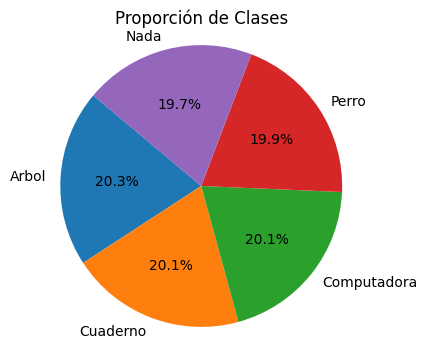

In [192]:
# Dataset de ejemplo:
example_dataset = pd.read_csv(balanced_path+"/Alex1/dataset.csv")

# Realiza el conteo de las clases en la columna "Expected Output"
class_counts = example_dataset["Expected Output"].value_counts()
print("Conteo de clases:")
print(class_counts)

# Calcula la proporción de cada clase con respecto al total:
classes_proportions = class_counts / len(example_dataset)

# Grafica las proporciones de clase:
plt.figure(figsize=(4, 4))
plt.pie(classes_proportions, labels=classes_proportions.index, autopct='%1.1f%%', startangle=140)
plt.title("Proporción de Clases")
plt.axis("equal")
plt.show()
